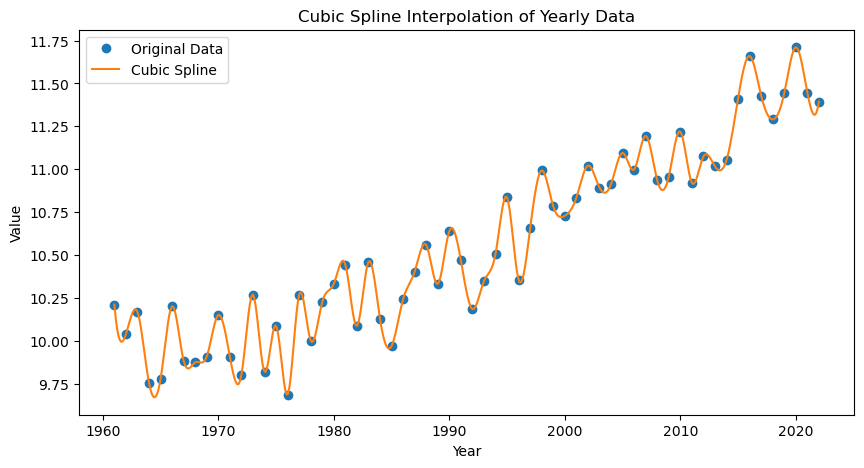

Pearson correlation coefficient:
              temperatures  disasters
temperatures      1.000000   0.845017
disasters         0.845017   1.000000

Spearman correlation coefficient:
              temperatures  disasters
temperatures      1.000000   0.823894
disasters         0.823894   1.000000


In [4]:
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the Excel file
# Replace 'path_to_file.xlsx' with the path to your actual Excel file
df = pd.read_excel('/home/jovyan/CSCI3656/Final project/annual_temps.xltx')

# Step 2: Extract the data
# Assuming the years are in the format 'F1961', 'F1962', etc., in the columns
# And that there's only one row of data, as in the image provided
years = [int(col[1:]) for col in df.columns if col.startswith('F')]  # Extract years
temperatures = df.iloc[0, 2:].values  # Skip the first two columns 'ObjectId', 'Country'


cs = CubicSpline(years, temperatures)

x_new = np.linspace(min(years), max(years), 500)
y_new = cs(x_new)

plt.figure(figsize=(10, 5))
plt.plot(years, temperatures, 'o', label='Original Data')
plt.plot(x_new, y_new, label='Cubic Spline')
plt.title('Cubic Spline Interpolation of Yearly Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

df2 = pd.read_csv('/home/jovyan/CSCI3656/Final project/disasters_data.csv')


# Select a row by index (for example, row 5)
disaster_total = df2.iloc[970]

temp_1980 = temperatures[19:].tolist()
disaster_1980 = disaster_total[8:].tolist()

# Create a DataFrame
df3 = pd.DataFrame({'temperatures': temp_1980, 'disasters': disaster_1980})
# print(df3)

# Calculate Pearson correlation
pearson_corr = df3.corr(method='pearson', numeric_only=True)

# Calculate Spearman correlation
spearman_corr = df3.corr(method='spearman', numeric_only=True)

# Print the correlation coefficients
print("Pearson correlation coefficient:")
print(pearson_corr)

print("\nSpearman correlation coefficient:")
print(spearman_corr)



Pearson correlation coefficient:
              temperatures  disasters
temperatures      1.000000   0.845017
disasters         0.845017   1.000000

Spearman correlation coefficient:
              temperatures  disasters
temperatures      1.000000   0.823894
disasters         0.823894   1.000000
